#### Import Basic Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Load Data 

In [3]:
df_adv=pd.read_csv('Advertising.csv')
df_adv

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


#### Eda

#### Check Null Value

In [4]:
df_adv.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df_adv.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

#### No Null Value is found its is good to see

In [7]:
df_adv.info

<bound method DataFrame.info of      Unnamed: 0     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9
..          ...    ...    ...        ...    ...
195         196   38.2    3.7       13.8    7.6
196         197   94.2    4.9        8.1    9.7
197         198  177.0    9.3        6.4   12.8
198         199  283.6   42.0       66.2   25.5
199         200  232.1    8.6        8.7   13.4

[200 rows x 5 columns]>

#### Information of dataset 

In [8]:
df_adv.shape

(200, 5)

#### 200 Rows and 5 Columns

In [9]:
df_adv.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### Using Describe Method see the mean/median/mode/25th percentile ,75th percentile min max value

#### Visualization 

<AxesSubplot:>

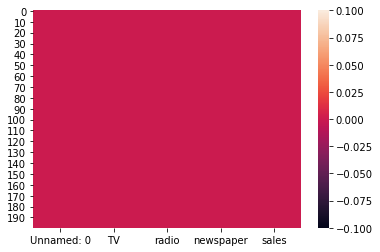

In [11]:
sns.heatmap(df_adv.isnull())

#### Using heat map see  no null value is in dataset

<AxesSubplot:xlabel='TV', ylabel='Density'>

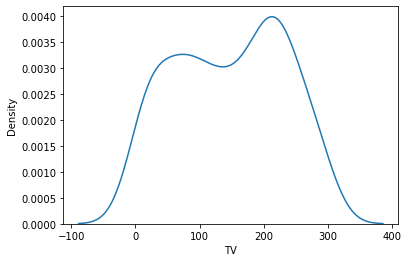

In [22]:
sns.kdeplot(df_adv['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

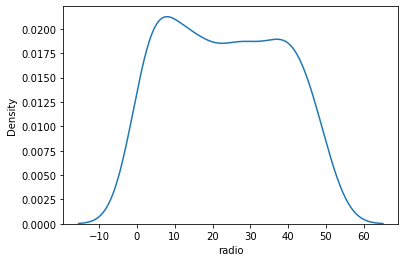

In [23]:
sns.kdeplot(df_adv['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

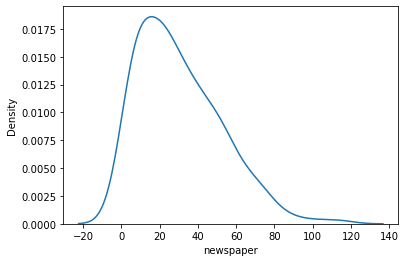

In [24]:
sns.kdeplot(df_adv['newspaper'])

#### from above plot shows the skeness and presence of outliers ,from kdeplot its seems that outlier is not more

<AxesSubplot:title={'center':'Comparision between sales and newspaper'}, xlabel='sales', ylabel='newspaper'>

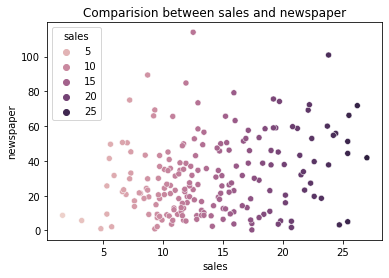

In [27]:
plt.title('Comparision between sales and newspaper')
sns.scatterplot(x=df_adv['sales'], y=df_adv['newspaper'],hue=df_adv['sales'])

<AxesSubplot:title={'center':'Comparision between TV and newspaper'}, xlabel='TV', ylabel='newspaper'>

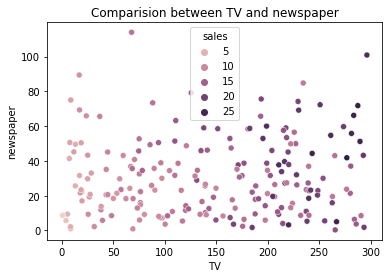

In [28]:
plt.title('Comparision between TV and newspaper')
sns.scatterplot(x=df_adv['TV'], y=df_adv['newspaper'],hue=df_adv['sales'])

<AxesSubplot:title={'center':'Comparision between TV and radio'}, xlabel='TV', ylabel='radio'>

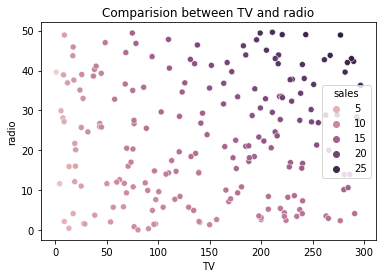

In [29]:
plt.title('Comparision between TV and radio')
sns.scatterplot(x=df_adv['TV'], y=df_adv['radio'],hue=df_adv['sales'])

#### all points are colser to each other less ouliers is showing which is far away from poiting

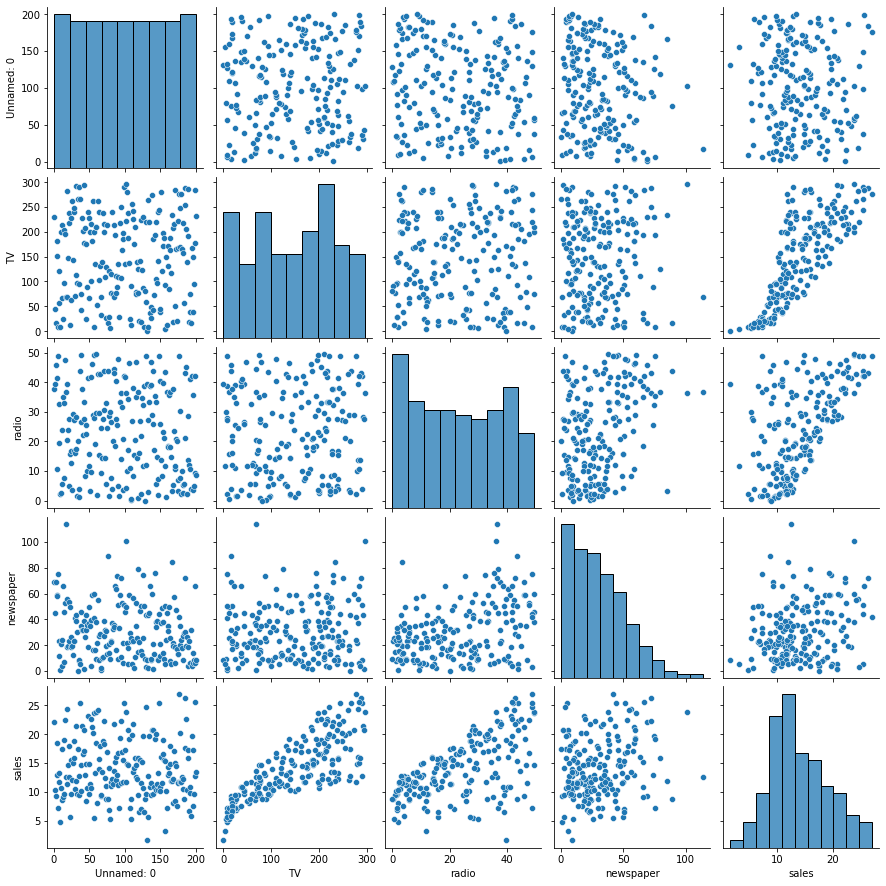

In [30]:
sns.pairplot(df_adv)

<AxesSubplot:xlabel='TV', ylabel='Count'>

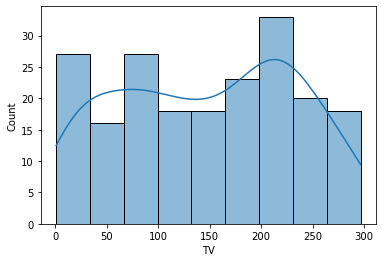

In [31]:
sns.histplot(df_adv['TV'],kde=True)

<AxesSubplot:xlabel='radio', ylabel='Count'>

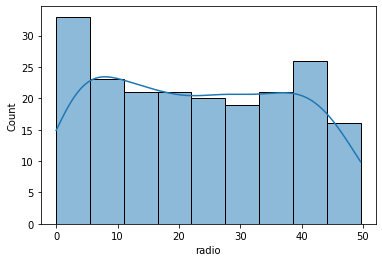

In [32]:
sns.histplot(df_adv['radio'],kde=True)

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

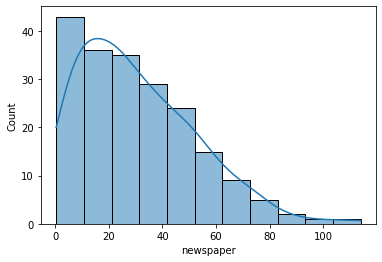

In [33]:
sns.histplot(df_adv['newspaper'],kde=True)

#### Data is skwed in newspaper columns

#### Using Boxplot Check the presence of outliers

<AxesSubplot:xlabel='TV'>

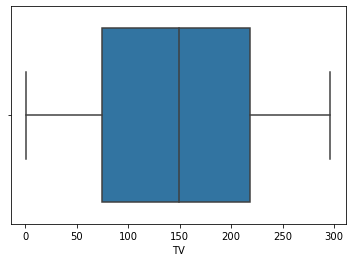

In [34]:
sns.boxplot(df_adv['TV'])

<AxesSubplot:xlabel='radio'>

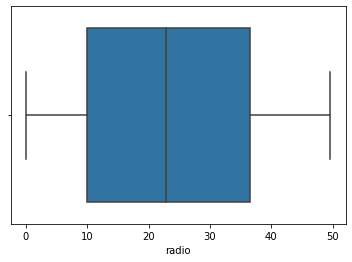

In [35]:
sns.boxplot(df_adv['radio'])

<AxesSubplot:xlabel='newspaper'>

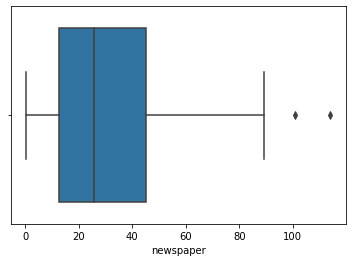

In [36]:
sns.boxplot(df_adv['newspaper'])

#### Two Outliers are deducted and let check the skewness

In [38]:
df_adv.skew()

Unnamed: 0    0.000000
TV           -0.069853
radio         0.094175
newspaper     0.894720
sales         0.407571
dtype: float64

#### Data Cleaning

In [40]:
import sklearn
from scipy.stats import zscore
z=np.abs(zscore(df_adv))
z

array([[1.72341210e+00, 9.69852266e-01, 9.81522472e-01, 1.77894547e+00,
        1.55205313e+00],
       [1.70609137e+00, 1.19737623e+00, 1.08280781e+00, 6.69578760e-01,
        6.96046111e-01],
       [1.68877065e+00, 1.51615499e+00, 1.52846331e+00, 1.78354865e+00,
        9.07405869e-01],
       [1.67144992e+00, 5.20496822e-02, 1.21785493e+00, 1.28640506e+00,
        8.60330287e-01],
       [1.65412920e+00, 3.94182198e-01, 8.41613655e-01, 1.28180188e+00,
        2.15683025e-01],
       [1.63680847e+00, 1.61540845e+00, 1.73103399e+00, 2.04592999e+00,
        1.31091086e+00],
       [1.61948775e+00, 1.04557682e+00, 6.43904671e-01, 3.24708413e-01,
        4.27042783e-01],
       [1.60216702e+00, 3.13436589e-01, 2.47406325e-01, 8.72486994e-01,
        1.58039455e-01],
       [1.58484630e+00, 1.61657614e+00, 1.42906863e+00, 1.36042422e+00,
        1.77205942e+00],
       [1.56752558e+00, 6.16042873e-01, 1.39530685e+00, 4.30581584e-01,
        6.57617064e-01],
       [1.55020485e+00, 9.4515

In [41]:
threshold=3
print(np.where(z>3))

(array([ 16, 101], dtype=int64), array([3, 3], dtype=int64))


In [43]:
print('shape before removing the outliers :',df_adv.shape)

dsnew=df_adv[(z<3).all(axis=1)]


print('Shape after removing the ouliers :',dsnew.shape)

shape before removing the outliers : (200, 5)
Shape after removing the ouliers : (198, 5)


In [49]:
losspercent=(200-198)/200*100

In [50]:
losspercent ### 1 % pecent lose

1.0

<AxesSubplot:xlabel='newspaper'>

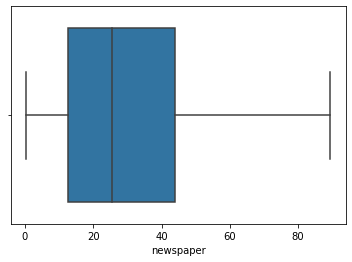

In [44]:
sns.boxplot(dsnew['newspaper'])

#### Outliers removed 

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

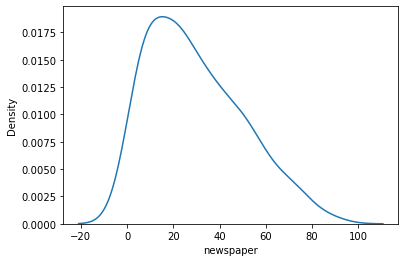

In [45]:
sns.kdeplot(dsnew['newspaper'])

#### seems to like normal curve

<AxesSubplot:xlabel='radio', ylabel='Density'>

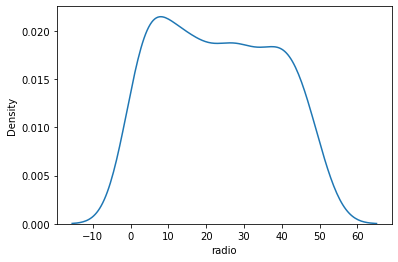

In [46]:
sns.kdeplot(dsnew['radio'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

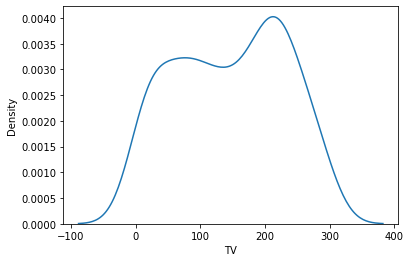

In [47]:
sns.kdeplot(dsnew['TV'])

#### Separate the columns in feature and Target variable

In [51]:
x=dsnew.drop(['sales','Unnamed: 0'],axis=1)

In [52]:
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [53]:
y=dsnew['sales']

In [54]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 198, dtype: float64

#### Train Model

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#### finding the best random state

In [62]:
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At Random State {i},the tarining accuracy is :- ",{r2_score(y_train,pred_train)})
    print(f"At Random State {i},the tarining accuracy is :- ",{r2_score(y_test,pred_test)})
    print("\n")

At Random State 1,the tarining accuracy is :-  {0.8866887017038588}
At Random State 1,the tarining accuracy is :-  {0.9050738919118466}


At Random State 2,the tarining accuracy is :-  {0.9141433055828942}
At Random State 2,the tarining accuracy is :-  {0.8589220576632957}


At Random State 3,the tarining accuracy is :-  {0.9038925314200131}
At Random State 3,the tarining accuracy is :-  {0.8799771974439149}


At Random State 4,the tarining accuracy is :-  {0.9089751569789106}
At Random State 4,the tarining accuracy is :-  {0.8428842422370586}


At Random State 5,the tarining accuracy is :-  {0.899219313349863}
At Random State 5,the tarining accuracy is :-  {0.8796163063935263}


At Random State 6,the tarining accuracy is :-  {0.9018421837092286}
At Random State 6,the tarining accuracy is :-  {0.8791116776134571}


At Random State 7,the tarining accuracy is :-  {0.8906859470551712}
At Random State 7,the tarining accuracy is :-  {0.903975463667749}


At Random State 8,the tarining accur

#### 16 is the optimal one so it can be use as best random state

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=16)

In [64]:
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
pred_test=lr.predict(x_test)

In [74]:
pred_train=lr.predict(x_train)

In [66]:
pred_test

array([ 7.21439945, 18.92622526, 19.81802428, 22.36890743, 12.76130218,
       15.40124004, 11.81332222, 11.58947661, 14.25588946, 20.29246087,
       13.88523247, 10.57858762,  9.9344461 ,  9.09282779, 15.21800147,
        8.92510317, 16.34813736,  5.5931969 , 20.5944616 , 17.12922203,
       17.85226788, 12.05683606, 21.46262885, 12.7244972 ,  7.57263881,
       13.77304652, 21.14585516, 12.2713119 ,  4.61518361, 18.64573649,
       22.70400428, 10.26777844, 16.73491529, 10.48528535, 12.56098856,
       20.37571761, 16.11437816, 15.59514623,  7.01167344, 10.70366005,
        9.96501102, 10.12442547,  6.23559159, 17.38245789, 10.65680295,
       14.70422317, 15.3714367 ,  9.83701089, 11.58903941,  9.76202624])

In [67]:
print(r2_score(y_test,pred_test))

0.8975078269869035


#### Cross validation of the Model

In [82]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv fold is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for test is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv fold is 0.8886177292201751 and accuracy score for training is 0.8933835577571034 and accuracy score for test is 0.8975078269869035


At cross fold 3 the cv fold is 0.8890406332045909 and accuracy score for training is 0.8933835577571034 and accuracy score for test is 0.8975078269869035


At cross fold 4 the cv fold is 0.8880501918930908 and accuracy score for training is 0.8933835577571034 and accuracy score for test is 0.8975078269869035


At cross fold 5 the cv fold is 0.8853605756683912 and accuracy score for training is 0.8933835577571034 and accuracy score for test is 0.8975078269869035


At cross fold 6 the cv fold is 0.8868174285063072 and accuracy score for training is 0.8933835577571034 and accuracy score for test is 0.8975078269869035


At cross fold 7 the cv fold is 0.8838282894864758 and accuracy score for training is 0.8933835577571034 and accuracy score for test is 0.8975078269869035


At cross fold 8 the cv fold is 0.8880334554150219 and accuracy s

#### Number does not have any impact on the fold so use any of fold select 2

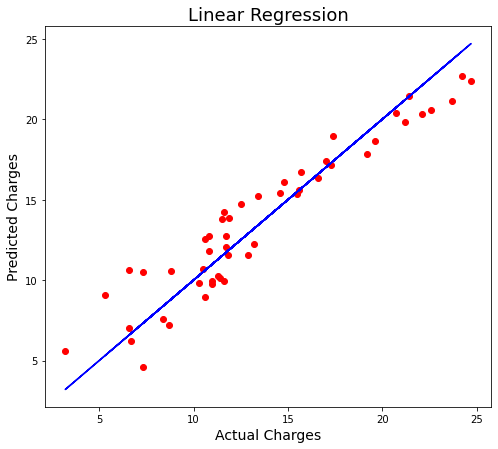

In [83]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges',fontsize=14)
plt.ylabel('Predicted Charges',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

#### best fit line is covering most of the datapoints it is good fit our model

#### Reguralization

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [89]:
parameters ={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [90]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)

In [91]:
lss

0.898492495720579

In [93]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
cv_mean

0.8898752647193156

#### Ensemble Techniques

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [97]:
parametersRF={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()

In [98]:
clf=GridSearchCV(rf,parametersRF)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [102]:
rf=RandomForestRegressor(criterion="mae",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision = rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=2)
rfc=rfscore.mean()
print('cross_val_score',rfc*100)

R2_score: 98.30952908374772
cross_val_score 96.98137583178475


#### getting R2_score =98.30 % and cross val score 96.98 %

#### shaving the model

In [106]:
import joblib
Final_model='salespredict.pkl'
joblib.dump(rf,open(Final_model, 'wb'))